# Modelo de Classificação Linear para Predição de Sucesso em Concessão de Grants

## 1. Introdução ao Modelo Linear

### 1.1 O Problema de Classificação

Este notebook tem como intuito implementar um modelo de classificação linear para prever o sucesso de solicitações de grants (bolsas de pesquisa) feitas entre 2005 e 2008. O dataset contém:

- **N = 8708** observações totais
- **D = 1882** variáveis preditoras originais (reduzidas para 252)
- **Variável resposta:** `Class` (successful/unsuccessful)

### 1.2 Escolha do Modelo: Regressão Logística

Neste caso, foi escolhido a **Regressão Logística** em vez da Análise Discriminante Linear (LDA) pelos seguintes motivos:

1. Não necessitar que os preditores sigam uma distribuição normal multivariada dentro de cada classe, diferentemente da LDA que precisa assumir isso. Para um dataset com uma quantidade grande variáveis, como no caso em questão, é melhor não lidar com isso.

2. Os coeficientes da regressão logística podem ser interpretados como log odds ratio, facilitando a compreensão do impacto de cada variável.

3. A regresão logística pode ser facilmente combinada com técnicas de regularização, como L1/L2, úteis quando há multicolinearidade entre preditores.

4. A regresão logística é um dos métodos mais utilizados em problemas de classificação binária na literatura.

### 1.3 Por que um Modelo Linear?

Modelos lineares são um excelente ponto de partida, pois correm menos risco de overfitting e são mais eficientes computacionalmente. Os resultados podem servir como referência para comparação com modelos não-lineares.

## 2. Base Teórica

### 2.1 Fundamentos da Regressão Logística

A **Regressão Logística** é um modelo de classificação que estima a probabilidade de uma observação pertencer a uma determinada classe. Diferentemente da regressão linear, que prevê valores contínuos, a regressão logística usa a função **sigmoide** (ou logística) para mapear os valores em probabilidades no intervalo [0, 1].

### 2.2 Formulação Matemática

#### Modelo Linear Subjacente
Dado um vetor de características $\mathbf{x} = (x_1, x_2, ..., x_p)^T$, define-se:

$$z = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + ... + \beta_p x_p = \mathbf{\beta}^T \mathbf{x}$$

onde $\beta_0$ é o intercepto e $\beta_1, ..., \beta_p$ são os coeficientes dos preditores.

#### Função Sigmoide
A probabilidade de pertencer à classe positiva (successful) é dada por:

$$P(Y=1|\mathbf{x}) = \sigma(z) = \frac{1}{1 + e^{-z}} = \frac{e^z}{1 + e^z}$$

#### Log-Odds (Logit)
A transformação inversa mostra que a regressão logística modela o **log-odds**:

$$\log\left(\frac{P(Y=1)}{1-P(Y=1)}\right) = \mathbf{\beta}^T \mathbf{x}$$

### 2.3 Estimação dos Parâmetros

Os coeficientes são estimados por **Máxima Verossimilhança**. A função de verossimilhança para $n$ observações é:

$$L(\mathbf{\beta}) = \prod_{i=1}^{n} p_i^{y_i}(1-p_i)^{1-y_i}$$

onde $p_i = P(Y_i=1|\mathbf{x}_i)$. Na prática, maximiza-se o log da verossimilhança:

$$\ell(\mathbf{\beta}) = \sum_{i=1}^{n} \left[ y_i \log(p_i) + (1-y_i)\log(1-p_i) \right]$$

### 2.4 Interpretação dos Coeficientes

- **Intercepto ($\beta_0$):** Log-odds quando todos os preditores são zero
- **Coeficiente ($\beta_j$):** Mudança no log-odds para cada unidade de aumento em $x_j$, mantendo os demais constantes
- **Odds Ratio:** $e^{\beta_j}$ representa o fator multiplicativo nos odds

### 2.5 Fronteira de Decisão

A classificação é feita com base em um limiar, tipicamente 0.5:

$$\hat{y} = \begin{cases} 1 & \text{se } P(Y=1|\mathbf{x}) \geq 0.5 \\ 0 & \text{caso contrário} \end{cases}$$

A **fronteira de decisão** é definida pelo hiperplano $\mathbf{\beta}^T \mathbf{x} = 0$, que é linear no espaço das features.

### 2.6 Classificação Linear vs. Não-Linear

Podemos comparar os modelos lineares e não-lineares em termos de fronteira de decisão, complexidade, risco de overfitting e interpretabilidade.

Os modelos lineares apresentam uma fronteira de decisão linear, enquanto os modelos não-lineares podem ter fronteiras de decisão complexas. Os modelos lineares possuem baixa complexidade e são menos propensos a overfitting, enquanto os modelos não-lineares são mais complexos e podem sofrer de overfitting com mais facilidade. Já em relação à interpretabilidade, os modelos lineares são mais fáceis de interpretar, já que os coeficientes podem ser interpretados diretamente como log-odds ratios.

### 2.7 Hipóteses da Regressão Logística

Ao utilizarmos a regressão logística, devemos verificar se as hipóteses do modelo são atendidas. 

É assumido uma relação linear entre preditores e log-odds, que é a base do modelo. Além disso, devemos verificar se as observações são independentes e se não há multicolinearidade severa entre os preditores. Por fim, devemos verificar se o tamanho amostral é adequado, ou seja, se temos pelo menos 10-20 eventos por preditor.

### 2.8 Vantagens e Limitações

Dentre as vantagens de se usar regressão logística, podemos citar a interpretabilidade clara dos coeficientes, o fornecimento de probabilidades calibradas, além de ser computacionalmente eficiente, menos propensa a overfitting e bem estabelecida teoricamente.

Já em relação às limitações, devemos considerar a suposição de linearidade entre preditores e log-odds, considerar que o desempenho pode ser inferior em dados não-linearmente separáveis, considerar que é sensível a outliers nas features e considerar que requer tratamento de multicolinearidade.

## 3. Preparação dos Dados

### 3.1 Importação das Bibliotecas

In [106]:
# Bibliotecas essenciais
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import (
    confusion_matrix, 
    accuracy_score, 
    classification_report,
    ConfusionMatrixDisplay,
)

# Configurações de visualização
plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['font.size'] = 12

print("Bibliotecas importadas com sucesso!")

Bibliotecas importadas com sucesso!


### 3.2 Carregamento dos Dados

In [107]:
# Caminhos dos arquivos
DATA_PATH = '../data/'

# Carregamento dos datasets
print("Carregando dados...")
df_train = pd.read_csv(DATA_PATH + 'training.csv')
df_test = pd.read_csv(DATA_PATH + 'testing.csv')
df_reduced_set = pd.read_csv(DATA_PATH + 'reducedSet.csv')

print(f"\nDataset de treinamento: {df_train.shape}")
print(f"Dataset de teste: {df_test.shape}")
print(f"Variáveis no reducedSet: {len(df_reduced_set)}")

Carregando dados...

Dataset de treinamento: (8190, 1882)
Dataset de teste: (518, 1882)
Variáveis no reducedSet: 252


### 3.3 Extração das Variáveis do ReducedSet

In [108]:
# Obter nomes das variáveis do reducedSet
reduced_vars = df_reduced_set['x'].tolist()
print(f"Total de variáveis no reducedSet: {len(reduced_vars)}")
print(f"\nPrimeiras 10 variáveis: {reduced_vars[:10]}")
print(f"Últimas 10 variáveis: {reduced_vars[-10:]}")

Total de variáveis no reducedSet: 252

Primeiras 10 variáveis: ['NumCI', 'NumDR', 'NumECI', 'NumPS', 'NumSCI', 'NumSR', 'NumUNK', 'CI.1940', 'CI.1945', 'CI.1950']
Últimas 10 variáveis: ['Nov', 'Oct', 'Sep', 'Fri', 'Mon', 'Sat', 'Thurs', 'Tues', 'Wed', 'Day']


In [109]:
# Verificar quais variáveis do reducedSet estão disponíveis nos dados
available_vars = [col for col in reduced_vars if col in df_train.columns]
missing_vars = [col for col in reduced_vars if col not in df_train.columns]

print(f"Variáveis disponíveis: {len(available_vars)}")
print(f"Variáveis ausentes: {len(missing_vars)}")

if missing_vars:
    print(f"\nVariáveis não encontradas: {missing_vars[:5]}...") if len(missing_vars) > 5 else print(f"Variáveis não encontradas: {missing_vars}")

Variáveis disponíveis: 252
Variáveis ausentes: 0


### 3.4 Separação de Features (X) e Target (y)

In [110]:
# Verificar se 'Class' está presente
print("Verificando variável resposta 'Class':")
print(f"  Presente no treino: {'Class' in df_train.columns}")
print(f"  Presente no teste: {'Class' in df_test.columns}")

# Valores únicos da variável Class
print(f"\nValores únicos de Class no treino: {df_train['Class'].unique()}")
print(f"Valores únicos de Class no teste: {df_test['Class'].unique()}")

Verificando variável resposta 'Class':
  Presente no treino: True
  Presente no teste: True

Valores únicos de Class no treino: ['successful' 'unsuccessful']
Valores únicos de Class no teste: ['unsuccessful' 'successful']


In [111]:
# Separação X e y
X_train = df_train[available_vars]
y_train = df_train['Class']

X_test = df_test[available_vars]
y_test = df_test['Class']

print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (8190, 252)
y_train shape: (8190,)
X_test shape: (518, 252)
y_test shape: (518,)


### 3.5 Verificações Básicas

In [112]:
# Verificar tipos de dados
print("=" * 50)
print("VERIFICAÇÃO DOS TIPOS DE DADOS")
print("=" * 50)
print(f"\nTipos de dados em X_train:")
print(X_train.dtypes.value_counts())

VERIFICAÇÃO DOS TIPOS DE DADOS

Tipos de dados em X_train:
int64    252
Name: count, dtype: int64


In [113]:
# Verificar valores ausentes
print("=" * 50)
print("VERIFICAÇÃO DE VALORES AUSENTES")
print("=" * 50)
print(f"\nValores ausentes em X_train: {X_train.isnull().sum().sum()}")
print(f"Valores ausentes em X_test: {X_test.isnull().sum().sum()}")
print(f"Valores ausentes em y_train: {y_train.isnull().sum()}")
print(f"Valores ausentes em y_test: {y_test.isnull().sum()}")

VERIFICAÇÃO DE VALORES AUSENTES

Valores ausentes em X_train: 0
Valores ausentes em X_test: 0
Valores ausentes em y_train: 0
Valores ausentes em y_test: 0


In [114]:
# Balanceamento de classes
print("=" * 50)
print("BALANCEAMENTO DAS CLASSES")
print("=" * 50)

print("\nDistribuição no conjunto de TREINO:")
train_dist = y_train.value_counts()
train_pct = y_train.value_counts(normalize=True) * 100
for cls in train_dist.index:
    print(f"  {cls}: {train_dist[cls]} ({train_pct[cls]:.2f}%)")

print("\nDistribuição no conjunto de TESTE:")
test_dist = y_test.value_counts()
test_pct = y_test.value_counts(normalize=True) * 100
for cls in test_dist.index:
    print(f"  {cls}: {test_dist[cls]} ({test_pct[cls]:.2f}%)")

BALANCEAMENTO DAS CLASSES

Distribuição no conjunto de TREINO:
  unsuccessful: 4387 (53.57%)
  successful: 3803 (46.43%)

Distribuição no conjunto de TESTE:
  unsuccessful: 329 (63.51%)
  successful: 189 (36.49%)


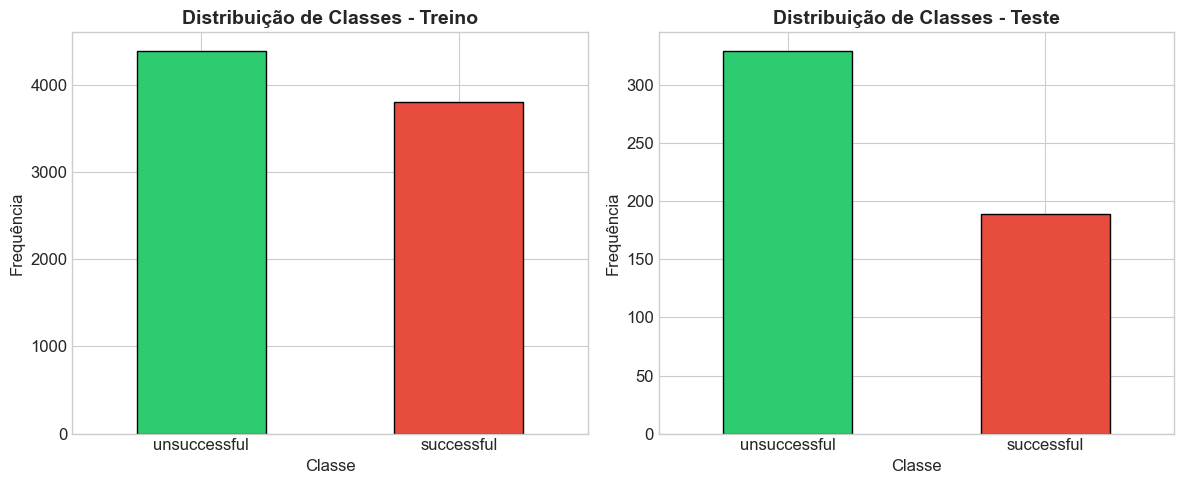


Figura salva em: ../data/dados_do_modelo_linear/class_distribution.png


In [115]:
# Visualização do balanceamento de classes
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Treino
colors = ['#2ecc71', '#e74c3c']
y_train.value_counts().plot(kind='bar', ax=axes[0], color=colors, edgecolor='black')
axes[0].set_title('Distribuição de Classes - Treino', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Classe')
axes[0].set_ylabel('Frequência')
axes[0].tick_params(axis='x', rotation=0)

# Teste
y_test.value_counts().plot(kind='bar', ax=axes[1], color=colors, edgecolor='black')
axes[1].set_title('Distribuição de Classes - Teste', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Classe')
axes[1].set_ylabel('Frequência')
axes[1].tick_params(axis='x', rotation=0)

plt.tight_layout()
plt.savefig('../data/dados_do_modelo_linear/class_distribution.png', dpi=150, bbox_inches='tight')
plt.show()

print("\nFigura salva em: ../data/dados_do_modelo_linear/class_distribution.png")

### 3.6 Codificação da Variável Resposta

In [116]:
# Codificar variável resposta
le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)
y_test_encoded = le.transform(y_test)

print("Mapeamento das classes:")
for i, cls in enumerate(le.classes_):
    print(f"  {cls} -> {i}")

print(f"\ny_train_encoded: {np.unique(y_train_encoded, return_counts=True)}")

Mapeamento das classes:
  successful -> 0
  unsuccessful -> 1

y_train_encoded: (array([0, 1]), array([3803, 4387], dtype=int64))


## 4. Treinamento do Modelo

### 4.1 Decisão sobre Regularização

Uma vez visto que o dataset possui 252 variáveis preditoras, foi optado utilizar **regularização L2 (Ridge)** por vários motivos:

1. **Multicolinearidade:** Com muitas variáveis potencialmente correlacionadas, a regularização ajuda a estabilizar os coeficientes
2. **Prevenção de overfitting:** A penalidade L2 evita que o modelo se ajuste demais aos dados de treino
3. **Melhor generalização:** Modelos regularizados tendem a ter melhor performance em dados novos

O parâmetro de regularização `C` (inverso da força de regularização) será definido como 1.0 (padrão), que oferece um bom equilíbrio entre bias e variância.

In [117]:
# Escalonamento das features (importante para regularização)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"X_train_scaled - Média: {X_train_scaled.mean():.6f}, Std: {X_train_scaled.std():.6f}")

X_train_scaled - Média: 0.000000, Std: 1.000000


### 4.2 Treinamento da Regressão Logística

In [118]:
# Definição e treinamento do modelo
print("Treinando modelo de Regressão Logística...")
print("="*50)

# Parâmetros do modelo
modelo_lr = LogisticRegression(
    penalty='l2',           # Regularização L2 (Ridge)
    C=1.0,                  # Força de regularização (inverso)
    solver='lbfgs',         # Algoritmo de otimização
    max_iter=1000,          # Máximo de iterações
    random_state=42,        # Reprodutibilidade
    n_jobs=-1               # Usar todos os cores
)

# Treinamento
modelo_lr.fit(X_train_scaled, y_train_encoded)

print("\nModelo treinado com sucesso!")
print(f"\nParâmetros do modelo:")
print(f"  - Regularização: L2 (Ridge)")
print(f"  - C (inverso da força): {modelo_lr.C}")
print(f"  - Solver: {modelo_lr.solver}")
print(f"  - Número de iterações: {modelo_lr.max_iter}")
print(f"  - Número de features usadas: {modelo_lr.n_features_in_}")
print(f"  - Classes: {le.classes_}")

Treinando modelo de Regressão Logística...

Modelo treinado com sucesso!

Parâmetros do modelo:
  - Regularização: L2 (Ridge)
  - C (inverso da força): 1.0
  - Solver: lbfgs
  - Número de iterações: 1000
  - Número de features usadas: 252
  - Classes: ['successful' 'unsuccessful']


In [119]:
# Análise dos coeficientes
coeficientes = pd.DataFrame({
    'Feature': available_vars,
    'Coeficiente': modelo_lr.coef_[0]
})

# Ordenar por valor absoluto
coeficientes['Abs_Coef'] = np.abs(coeficientes['Coeficiente'])
coeficientes = coeficientes.sort_values('Abs_Coef', ascending=False)

print("Top 15 variáveis mais importantes (maior valor absoluto do coeficiente):")
print("="*60)
print(coeficientes[['Feature', 'Coeficiente']].head(15).to_string(index=False))

Top 15 variáveis mais importantes (maior valor absoluto do coeficiente):
           Feature  Coeficiente
      Unsuccess.CI     1.458912
        Success.CI    -1.256077
               Mon     0.974130
ContractValueBandA    -0.973900
               Fri     0.973209
              Tues     0.893049
               Wed     0.811662
             Thurs     0.680470
       GrantCatUnk    -0.666313
               Sat     0.663648
               Jan    -0.576322
       GrantCat10A     0.520169
ContractValueBandD    -0.516815
ContractValueBandG    -0.488428
ContractValueBandF    -0.487352


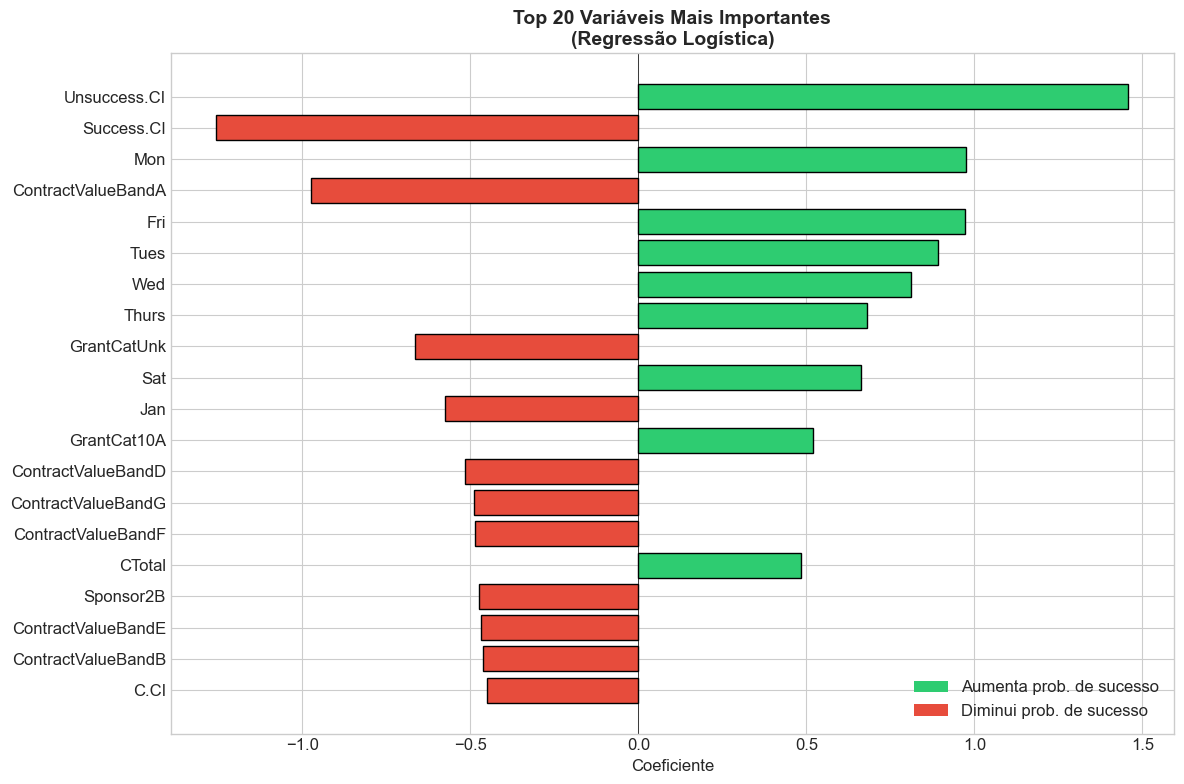


Figura salva em: ../data/dados_do_modelo_linear/top_coefficients.png


In [120]:
# Visualização dos coeficientes mais importantes
top_n = 20
top_coefs = coeficientes.head(top_n)

fig, ax = plt.subplots(figsize=(12, 8))

colors = ['#2ecc71' if c > 0 else '#e74c3c' for c in top_coefs['Coeficiente']]
bars = ax.barh(range(top_n), top_coefs['Coeficiente'], color=colors, edgecolor='black')

ax.set_yticks(range(top_n))
ax.set_yticklabels(top_coefs['Feature'])
ax.invert_yaxis()
ax.set_xlabel('Coeficiente', fontsize=12)
ax.set_title(f'Top {top_n} Variáveis Mais Importantes\n(Regressão Logística)', fontsize=14, fontweight='bold')
ax.axvline(x=0, color='black', linestyle='-', linewidth=0.5)

# Legenda
from matplotlib.patches import Patch
legend_elements = [
    Patch(facecolor='#2ecc71', label='Aumenta prob. de sucesso'),
    Patch(facecolor='#e74c3c', label='Diminui prob. de sucesso')
]
ax.legend(handles=legend_elements, loc='lower right')

plt.tight_layout()
plt.savefig('../data/dados_do_modelo_linear/top_coefficients.png', dpi=150, bbox_inches='tight')
plt.show()

print("\nFigura salva em: ../data/dados_do_modelo_linear/top_coefficients.png")

## 5. Avaliação no Conjunto de Teste

### 5.1 Predições

In [121]:
# Fazer predições
y_pred_encoded = modelo_lr.predict(X_test_scaled)
y_pred_proba = modelo_lr.predict_proba(X_test_scaled)

# Converter de volta para labels originais
y_pred = le.inverse_transform(y_pred_encoded)

print("Predições realizadas!")
print(f"\nTotal de predições: {len(y_pred)}")
print(f"Distribuição das predições:")
pred_dist = pd.Series(y_pred).value_counts()
for cls in pred_dist.index:
    print(f"  {cls}: {pred_dist[cls]} ({pred_dist[cls]/len(y_pred)*100:.2f}%)")

Predições realizadas!

Total de predições: 518
Distribuição das predições:
  unsuccessful: 326 (62.93%)
  successful: 192 (37.07%)


### 5.2 Matriz de Confusão

In [122]:
# Calcular matriz de confusão
cm = confusion_matrix(y_test, y_pred, labels=le.classes_)

print("MATRIZ DE CONFUSÃO")
print("="*50)
print(f"\nLabels: {le.classes_}")
print(f"\n{cm}")

# Descrição detalhada
print("\n" + "="*50)
print("INTERPRETAÇÃO:")
print("="*50)

# Assumindo que 'successful' é positivo (índice 1) e 'unsuccessful' é negativo (índice 0)
# Verificar ordem das classes
success_idx = list(le.classes_).index('successful')
unsuccess_idx = list(le.classes_).index('unsuccessful')

if success_idx == 1:
    TN, FP, FN, TP = cm.ravel()
else:
    TP, FN, FP, TN = cm.ravel()

print(f"\nVerdadeiros Positivos (TP): {TP}")
print(f"  → Grants que foram APROVADOS e o modelo previu APROVAÇÃO")

print(f"\nVerdadeiros Negativos (TN): {TN}")
print(f"  → Grants que foram REJEITADOS e o modelo previu REJEIÇÃO")

print(f"\nFalsos Positivos (FP): {FP}")
print(f"  → Grants que foram REJEITADOS mas o modelo previu APROVAÇÃO")

print(f"\nFalsos Negativos (FN): {FN}")
print(f"  → Grants que foram APROVADOS mas o modelo previu REJEIÇÃO")

MATRIZ DE CONFUSÃO

Labels: ['successful' 'unsuccessful']

[[149  40]
 [ 43 286]]

INTERPRETAÇÃO:

Verdadeiros Positivos (TP): 149
  → Grants que foram APROVADOS e o modelo previu APROVAÇÃO

Verdadeiros Negativos (TN): 286
  → Grants que foram REJEITADOS e o modelo previu REJEIÇÃO

Falsos Positivos (FP): 43
  → Grants que foram REJEITADOS mas o modelo previu APROVAÇÃO

Falsos Negativos (FN): 40
  → Grants que foram APROVADOS mas o modelo previu REJEIÇÃO


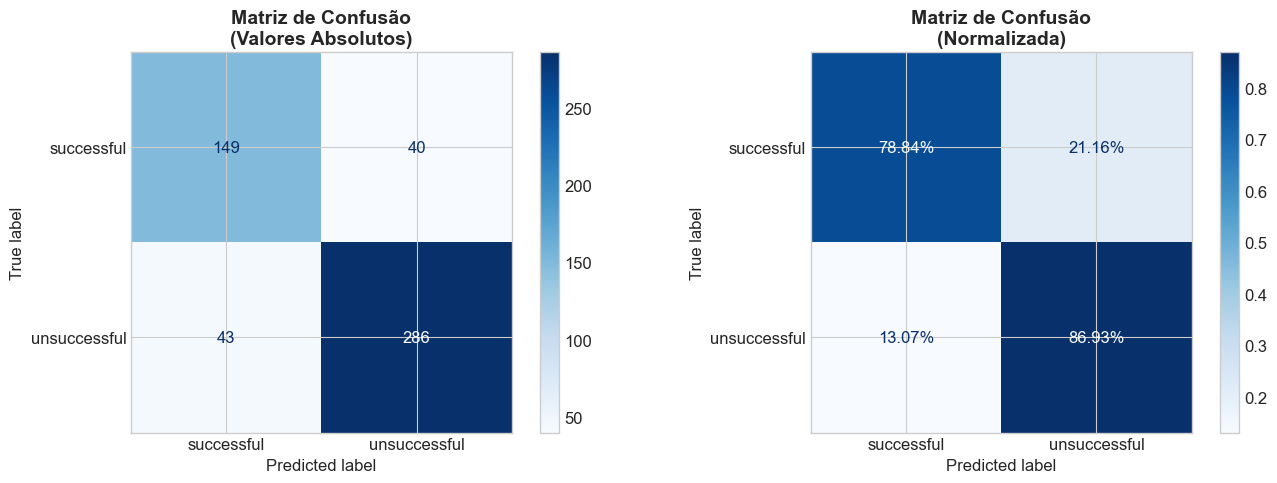


Figura salva em: ../data/dados_do_modelo_linear/confusion_matrix.png


In [123]:
# Visualização da matriz de confusão
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Matriz com valores absolutos
disp1 = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le.classes_)
disp1.plot(ax=axes[0], cmap='Blues', values_format='d')
axes[0].set_title('Matriz de Confusão\n(Valores Absolutos)', fontsize=14, fontweight='bold')

# Matriz normalizada (proporções)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
disp2 = ConfusionMatrixDisplay(confusion_matrix=cm_normalized, display_labels=le.classes_)
disp2.plot(ax=axes[1], cmap='Blues', values_format='.2%')
axes[1].set_title('Matriz de Confusão\n(Normalizada)', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.savefig('../data/dados_do_modelo_linear/confusion_matrix.png', dpi=150, bbox_inches='tight')
plt.show()

print("\nFigura salva em: ../data/dados_do_modelo_linear/confusion_matrix.png")

### 5.3 Cálculo da Acurácia

In [124]:
# Acurácia
accuracy = accuracy_score(y_test, y_pred)

print("MÉTRICAS DE DESEMPENHO")
print("="*50)
print(f"\n📊 ACURÁCIA GERAL: {accuracy:.4f} ({accuracy*100:.2f}%)")
print(f"\nO modelo acertou {int(accuracy * len(y_test))} de {len(y_test)} predições")

MÉTRICAS DE DESEMPENHO

📊 ACURÁCIA GERAL: 0.8398 (83.98%)

O modelo acertou 435 de 518 predições


In [125]:
# Relatório de classificação completo
print("\nRELATÓRIO DE CLASSIFICAÇÃO")
print("="*50)
print(classification_report(y_test, y_pred, target_names=le.classes_))


RELATÓRIO DE CLASSIFICAÇÃO
              precision    recall  f1-score   support

  successful       0.78      0.79      0.78       189
unsuccessful       0.88      0.87      0.87       329

    accuracy                           0.84       518
   macro avg       0.83      0.83      0.83       518
weighted avg       0.84      0.84      0.84       518



## 6. Análise dos Resultados

### 6.1 Interpretação da Matriz de Confusão

In [126]:
# Métricas derivadas da matriz de confusão
sensitivity = TP / (TP + FN)  # Recall para classe positiva
specificity = TN / (TN + FP)  # Recall para classe negativa
precision = TP / (TP + FP)    # Precisão para classe positiva
f1 = 2 * (precision * sensitivity) / (precision + sensitivity)

print("ANÁLISE DA MATRIZ DE CONFUSÃO")
print("="*60)
print(f"\n📈 Sensibilidade (Recall para 'successful'): {sensitivity:.4f}")
print(f"   O modelo identifica corretamente {sensitivity*100:.1f}% dos grants aprovados")

print(f"\n📉 Especificidade (Recall para 'unsuccessful'): {specificity:.4f}")
print(f"   O modelo identifica corretamente {specificity*100:.1f}% dos grants rejeitados")

print(f"\n🎯 Precisão (para 'successful'): {precision:.4f}")
print(f"   Quando o modelo prevê aprovação, acerta {precision*100:.1f}% das vezes")

ANÁLISE DA MATRIZ DE CONFUSÃO

📈 Sensibilidade (Recall para 'successful'): 0.7884
   O modelo identifica corretamente 78.8% dos grants aprovados

📉 Especificidade (Recall para 'unsuccessful'): 0.8693
   O modelo identifica corretamente 86.9% dos grants rejeitados

🎯 Precisão (para 'successful'): 0.7760
   Quando o modelo prevê aprovação, acerta 77.6% das vezes


### 6.2 Análise dos Tipos de Erros no Contexto de Grants

Os falsos positivos (43) representam situações em que o modelo previu a aprovação do grant, mas na realidade a solicitação foi rejeitada. No contexto prático, isso pode levar pesquisadores a criarem expectativas irreais sobre o sucesso de suas propostas, potencialmente alocando recursos, tempo e esforço de equipe antecipadamente com base em uma aprovação que não se concretizará.

Os falsos negativos (40) ocorrem quando o modelo previu a rejeição do grant, mas na verdade a solicitação foi aprovada. Esse tipo de erro é particularmente prejudicial porque pode desencorajar pesquisadores a submeterem propostas que teriam boas chances de sucesso, resultando em perda de oportunidades de financiamento e subutilização do potencial de pesquisa da instituição.

## 7. Conclusões Parciais

### 7.1 Resumo do Desempenho

In [127]:
print("="*60)
print("RESUMO DO MODELO DE REGRESSÃO LOGÍSTICA")
print("="*60)

print("\n📋 CONFIGURAÇÃO:")
print(f"   • Algoritmo: Regressão Logística com regularização L2")
print(f"   • Número de features: {len(available_vars)}")
print(f"   • Amostras de treino: {len(y_train)}")
print(f"   • Amostras de teste: {len(y_test)}")

print("\n📊 MÉTRICAS DE DESEMPENHO:")
print(f"   • Acurácia: {accuracy*100:.2f}%")
print(f"   • Sensibilidade (Recall 'successful'): {sensitivity*100:.2f}%")
print(f"   • Especificidade (Recall 'unsuccessful'): {specificity*100:.2f}%")
print(f"   • Precisão ('successful'): {precision*100:.2f}%")
print(f"   • F1-Score: {f1:.4f}")

RESUMO DO MODELO DE REGRESSÃO LOGÍSTICA

📋 CONFIGURAÇÃO:
   • Algoritmo: Regressão Logística com regularização L2
   • Número de features: 252
   • Amostras de treino: 8190
   • Amostras de teste: 518

📊 MÉTRICAS DE DESEMPENHO:
   • Acurácia: 83.98%
   • Sensibilidade (Recall 'successful'): 78.84%
   • Especificidade (Recall 'unsuccessful'): 86.93%
   • Precisão ('successful'): 77.60%
   • F1-Score: 0.7822


Podemos ver que por mais que o resultado não tenha saído perfeito, foi um bom ponto de partida. Apesar das limitações já apresentadas anteriormente, a regressão logística obteve uma precisão de 77.6%, sendo um resultado consideravelmente positivo.

### 7.2 Expectativas para Modelos Não-Lineares

Para os modelos não-lineares espera-se que apresentem um melhor desempenho comparado com a regressão logística, visto que podem capturar relações complexas entre variáveis, possuem fronteiras de decisão mais flexíveis e melhor ajuste a padrões não-lineares nos dados. No entanto, há maior propensão a overfitting, perda de interpretabilidade e vão exigir um custo computacional superior.

In [128]:
# Salvar métricas para comparação posterior com os modelos não-lineares
metricas_modelo_linear = {
    'Modelo': 'Regressão Logística (L2)',
    'Acurácia': accuracy,
    'Sensibilidade': sensitivity,
    'Especificidade': specificity,
    'Precisão': precision,
    'F1-Score': f1,
    'TP': TP,
    'TN': TN,
    'FP': FP,
    'FN': FN
}

# Salvar em CSV
df_metricas = pd.DataFrame([metricas_modelo_linear])
df_metricas.to_csv('../data/dados_do_modelo_linear/metricas_modelo_linear.csv', index=False)

print("\nMétricas salvas em: ../data/dados_do_modelo_linear/metricas_modelo_linear.csv")
print("\nAs métricas do modelo linear foram salvas com o intuito de comparação com os demais modelos.")


Métricas salvas em: ../data/dados_do_modelo_linear/metricas_modelo_linear.csv

As métricas do modelo linear foram salvas com o intuito de comparação com os demais modelos.
